In [3]:
# Import functions --------------------------------------------------------

# rm(list=ls())
file_path = "../../Sources/Functions"
file.sources = list.files(path = file_path, pattern = "*.R$", full.names = TRUE)
sapply(file.sources, source)

library(tidyverse)
library(gridExtra)
library(R.matlab)
library(data.table)



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




../../Sources/Functions/align_pdf_gd_v2.R                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
value   function (f_origin_list, f_target_list, n0 = 0, step_size = 0.02, ,     MaxIter = 1000, stopping_redu = 1e-04, t_unit = 0.05, weights = NULL, ,     n0_min = 0, n0_max = length(f_origin_list[[1]])) , {,     if (!is.list(f_origin_list)) ,         f_origin_list = list(f_origin_list),     if (!is.list(f_target_list)) ,         f_target_list = list(f_target_list),     n0_min <- n0_min,     n0_max <- n0_max,     extend = function(f) {,         return(c(rep(head(f, 1), length(f) - 1), f, rep(tail(f, ,             1), 2 * round(length(f)/2)))),     },     f_origin_list = lapply(X = f_origin_list, FUN = extend),     f_target_list = lapply(X = f_target_list, FUN = extend),     if (!is.null(weights) && sum(weights) == 0) ,         stop("Weights cannot sum up to zero."),     if (!is.null(weights) && sum(weights) != 1) ,         weights = weights/sum(weights),     tmp_list = mapply(FUN = get_theta_gamma_prime_v2, f_origin = f_origin_list, ,         f_target = f_target_list, SIMPLIFY = FALSE),     theta_prime_list = lapply(X = tmp_list, FUN = "[[", "theta_prime"),     gamma_prime_list = lapply(X = tmp_list, FUN = "[[", "gamma_prime"),     pad_list = lapply(X = tmp_list, FUN = "[[", "pad"),     iter_count = 0,     dist_redu = Inf,     dist_curr = Inf,     while (dist_redu > stopping_redu && iter_count < MaxIter) {,         iter_count = iter_count + 1,         gd_list = mapply(FUN = gradient_v

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✓ tibble  3.0.6     ✓ dplyr   1.0.4
✓ tidyr   1.1.2     ✓ stringr 1.4.0
✓ readr   1.4.0     ✓ forcats 0.5.1
✓ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
x dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
x dplyr::combine()       masks gridExtra::combine()
x purrr::compose()       masks igraph::compose()
x tidyr::crossing()      masks igraph::crossing()
x dplyr::filter()        masks stats::filter()
x dplyr::groups()        masks igraph::groups()
x dplyr::lag()           masks stats::lag()
x purrr::simplify()      masks igraph::simplify()

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    betw

In [17]:
params = list(subj_name = 'func_20150417', 
              data_folder = "../../Results/Rdata/RDA_v3/CDF_v9_rmv1+3_keeptop_Nrestart1_totaltime336/")

In [18]:
# Get network information for the L/R side 
path_data = paste0("../../Processed_FunctionalData/",params$subj_name,"/")

### Read information from data
edge_time_mat = as.matrix(read.csv(paste(path_data, '/EdgeTime.csv', sep='')))
edge_time_mat = edge_time_mat[,-1]

avai.inds = as.matrix(read.csv(paste(path_data,'/AvaiNeurons.csv',sep='')))
avai.inds = avai.inds[,-1];

locs.all = as.matrix(read.csv(paste(path_data,'/locs_all.csv',sep='')))
locs.all = locs.all[,-1]
locs_mat = locs.all[avai.inds,]

mnx.all = as.matrix(read.csv(paste(path_data,'/mnx.csv',sep='')))
mnx.all = mnx.all[,-1]
mnx_vec = mnx.all[avai.inds]

dFF.all = as.matrix(fread(paste(path_data,'/dFF.csv',sep='')))
dFF.all = dFF.all[,-1]
dFF_mat = dFF.all[avai.inds,]


### Read information from results
data_folder = paste0(params$data_folder, params$subj_name, "/") 
path_vec = list.files(data_folder, full.names = TRUE, recursive = TRUE)

edge_time_mat_list = list()
avai_inds_list = list()
locs_mat_list = list()
mnx_vec_list = list()
dFF_mat_list = list()

res_list = list()
clusters_list = list()
center_pdf_array_list = list()
v_vec_list = list()

ICL_history_list = list()
compl_log_lik_history_list = list()

for(m in 1:length(path_vec)){ 
  path = path_vec[m]
  ### Read in results from data
  load(path)
  
  N_clus_est = 4
  res = res_Nclus[[N_clus_est]][[1]]
  res_list[[m]] = res
  
  edge_time_mat_list[[m]] = res$edge_time_mat
  avai_inds_list[[m]] = res$avai_inds
  locs_mat_list[[m]] = locs_mat[res$avai_inds, ]
  mnx_vec_list[[m]] = mnx_vec[res$avai_inds]
  dFF_mat_list[[m]] = dFF_mat[res$avai_inds, ]
  
  clusters_list[[m]] = res$clusters_list[[1]]
  center_pdf_array_list[[m]]= res$center_pdf_array
  v_vec_list[[m]] = res$v_vec
  
  ICL_history_list[[m]] = ICL_history
  compl_log_lik_history_list[[m]] = compl_log_lik_history
}


t_vec = res$t_vec
n0_mat_list = lapply(v_vec_list, function(v_vec) n0_vec2mat(n0_vec = v_vec/(t_vec[2]-t_vec[1])))
                     
print(which.max(ICL_history_list[[1]]+ICL_history_list[[2]]))

[1] 3


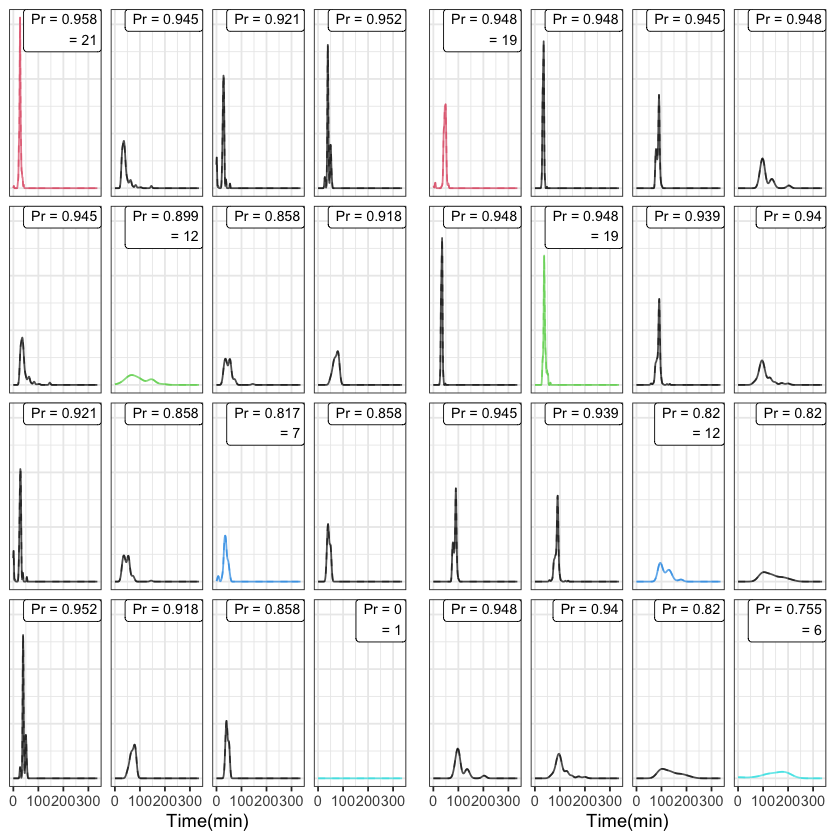

In [19]:
### Get cluster orders
order_clus_1 = order(rowSums(apply(center_pdf_array_list[[1]], 
      MARGIN = c(1,2),
      function(vec)sum(vec*(t_vec[2]-t_vec[1])))), 
      decreasing = TRUE)
order_clus_2 = order(rowSums(apply(center_pdf_array_list[[2]], 
      MARGIN = c(1,2),
      function(vec)sum(vec*(t_vec[2]-t_vec[1])))), 
      decreasing = TRUE)

### Get connecting probabilities, cluster sizes and memberships
clus_size_list = lapply(clusters_list, function(clusters)sapply(clusters,length))

pdf_array_1 = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE]#[1:3,1:3,]
pdf_array_2 = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE]#[1:3,1:3,]
                        
membership_list = list()
membership_list[[1]] = clus2mem(clusters_list[[1]][order_clus_1])
membership_list[[2]] = clus2mem(clusters_list[[2]][order_clus_2])


### Visualize estimated connecting intensities 
g1 = plot_pdf_array_v2(pdf_array_list = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE], 
                        pdf_true_array = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE],
                        clus_size_vec = clus_size_list[[1]][order_clus_1],
                        t_vec = t_vec, x_lim = c(), y_lim = c(0,max(unlist(center_pdf_array_list))))
                        
g2 = plot_pdf_array_v2(pdf_array_list = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE], 
                        pdf_true_array = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE],
                        clus_size_vec = clus_size_list[[2]][order_clus_2],
                        t_vec = t_vec, x_lim = c(), y_lim = c(0,max(unlist(center_pdf_array_list))))

grid.arrange(g1, g2, ncol=2)

In [20]:
avai_inds_list[[1]][clusters_list[[1]][order_clus_1][[4]]]

[1] 64

## Remove two nodes from Left spine

In [8]:
params = list(subj_name = 'func_20150417', 
              data_folder = "../../Results/Rdata/RDA_v3/CDF_v9_rmv2+3_keeptop_Nrestart1_totaltime336/")

In [9]:
# Get network information for the L/R side 
path_data = paste0("../../Processed_FunctionalData/",params$subj_name,"/")

### Read information from data
edge_time_mat = as.matrix(read.csv(paste(path_data, '/EdgeTime.csv', sep='')))
edge_time_mat = edge_time_mat[,-1]

avai.inds = as.matrix(read.csv(paste(path_data,'/AvaiNeurons.csv',sep='')))
avai.inds = avai.inds[,-1];

locs.all = as.matrix(read.csv(paste(path_data,'/locs_all.csv',sep='')))
locs.all = locs.all[,-1]
locs_mat = locs.all[avai.inds,]

mnx.all = as.matrix(read.csv(paste(path_data,'/mnx.csv',sep='')))
mnx.all = mnx.all[,-1]
mnx_vec = mnx.all[avai.inds]

dFF.all = as.matrix(fread(paste(path_data,'/dFF.csv',sep='')))
dFF.all = dFF.all[,-1]
dFF_mat = dFF.all[avai.inds,]


### Read information from results
data_folder = paste0(params$data_folder, params$subj_name, "/") 
path_vec = list.files(data_folder, full.names = TRUE, recursive = TRUE)

edge_time_mat_list = list()
avai_inds_list = list()
locs_mat_list = list()
mnx_vec_list = list()
dFF_mat_list = list()

res_list = list()
clusters_list = list()
center_pdf_array_list = list()
v_vec_list = list()

ICL_history_list = list()
compl_log_lik_history_list = list()

for(m in 1:length(path_vec)){ 
  path = path_vec[m]
  ### Read in results from data
  load(path)
  
  N_clus_est = 4
  res = res_Nclus[[N_clus_est]][[1]]
  res_list[[m]] = res
  
  edge_time_mat_list[[m]] = res$edge_time_mat
  avai_inds_list[[m]] = res$avai_inds
  locs_mat_list[[m]] = locs_mat[res$avai_inds, ]
  mnx_vec_list[[m]] = mnx_vec[res$avai_inds]
  dFF_mat_list[[m]] = dFF_mat[res$avai_inds, ]
  
  clusters_list[[m]] = res$clusters_list[[1]]
  center_pdf_array_list[[m]]= res$center_pdf_array
  v_vec_list[[m]] = res$v_vec
  
  ICL_history_list[[m]] = ICL_history
  compl_log_lik_history_list[[m]] = compl_log_lik_history
}


t_vec = res$t_vec
n0_mat_list = lapply(v_vec_list, function(v_vec) n0_vec2mat(n0_vec = v_vec/(t_vec[2]-t_vec[1])))
                     
print(which.max(ICL_history_list[[1]]+ICL_history_list[[2]]))

[1] 3


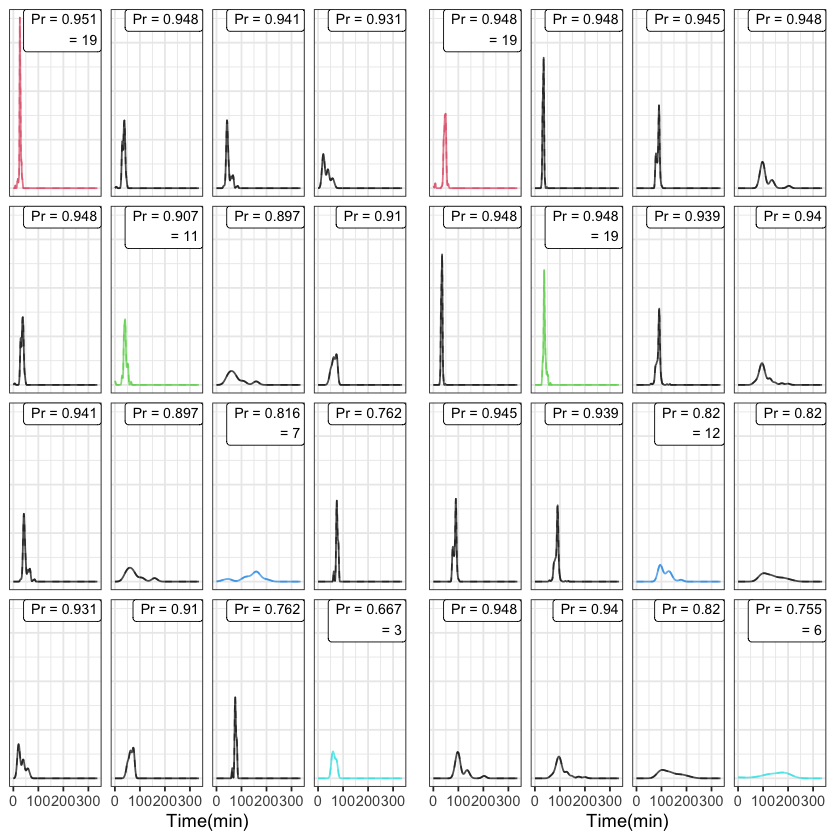

In [10]:
### Get cluster orders
order_clus_1 = order(rowSums(apply(center_pdf_array_list[[1]], 
      MARGIN = c(1,2),
      function(vec)sum(vec*(t_vec[2]-t_vec[1])))), 
      decreasing = TRUE)
order_clus_2 = order(rowSums(apply(center_pdf_array_list[[2]], 
      MARGIN = c(1,2),
      function(vec)sum(vec*(t_vec[2]-t_vec[1])))), 
      decreasing = TRUE)

### Get connecting probabilities, cluster sizes and memberships
clus_size_list = lapply(clusters_list, function(clusters)sapply(clusters,length))

pdf_array_1 = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE]#[1:3,1:3,]
pdf_array_2 = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE]#[1:3,1:3,]
                        
membership_list = list()
membership_list[[1]] = clus2mem(clusters_list[[1]][order_clus_1])
membership_list[[2]] = clus2mem(clusters_list[[2]][order_clus_2])


### Visualize estimated connecting intensities 
g1 = plot_pdf_array_v2(pdf_array_list = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE], 
                        pdf_true_array = center_pdf_array_list[[1]][order_clus_1,order_clus_1, ,drop=FALSE],
                        clus_size_vec = clus_size_list[[1]][order_clus_1],
                        t_vec = t_vec, x_lim = c(), y_lim = c(0,max(unlist(center_pdf_array_list))))
                        
g2 = plot_pdf_array_v2(pdf_array_list = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE], 
                        pdf_true_array = center_pdf_array_list[[2]][order_clus_2,order_clus_2, ,drop=FALSE],
                        clus_size_vec = clus_size_list[[2]][order_clus_2],
                        t_vec = t_vec, x_lim = c(), y_lim = c(0,max(unlist(center_pdf_array_list))))

grid.arrange(g1, g2, ncol=2)

In [16]:
avai_inds_list[[1]][clusters_list[[1]][order_clus_1][[4]]]

[1] 64 70 93